In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

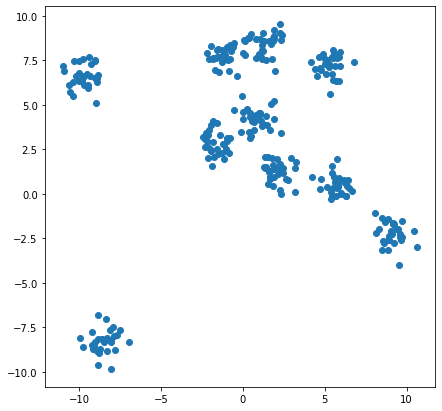

In [41]:
X, y = make_blobs(n_samples=300, centers=10, cluster_std=0.60, random_state=0)
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1])
plt.show()

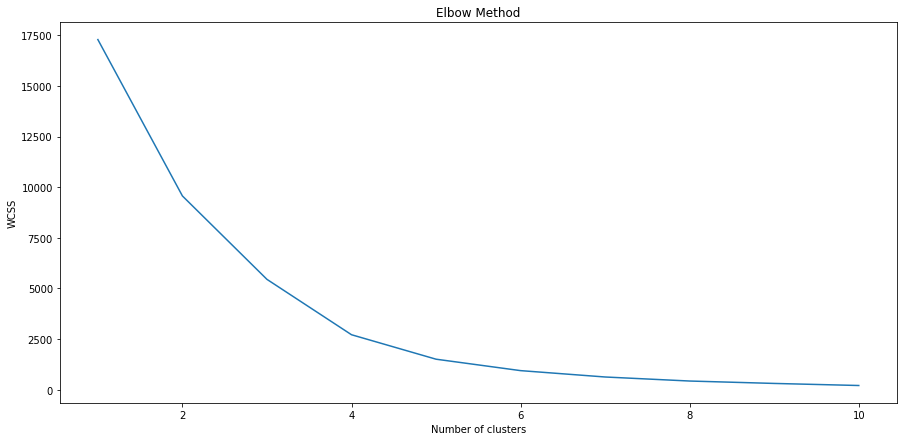

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,7))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

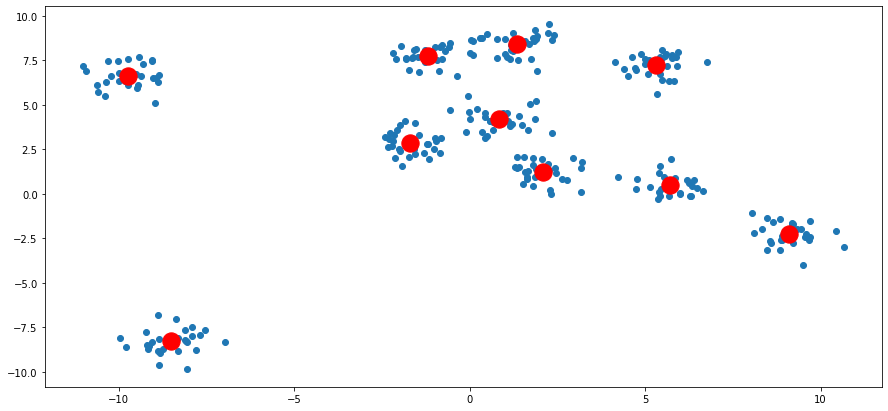

In [44]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.figure(figsize=(15,7))
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Implement KMeans

you will need

1. function to return clusters (in any way you think is ok) for the given data and centroids

2. function to return centroids (in any way you think is ok) for the given data

3. several iterations over steps 1 and 2

In [51]:
import numpy as np
import random

##### Euclidean Distance Caculator


In [53]:
def dist(a, b):
    return np.linalg.norm(a - b)

In [111]:
dist(5.5,6)

0.5

In [ ]:
## impementation  of KMeans

In [112]:

def cluster(data,n):
    ''''convert DataFrame to numpy array'''
    '''''data = data.rename_axis('ID').values''''''
    ''''chose random centers'''
        
    center_x=np.random.randint(0,np.max(data), n)
    center_y=np.random.randint(0,np.max(data), n)
    center=np.array(list(zip(center_x,center_y)),dtype=np.float32)
            
        
    ''''calculate dist'''
    c_old=np.zeros(center.shape)
    clusters = np.zeros(len(data))
    error=dist(center,c_old)
    while error!=0:
            #closest cluster
             for i in len(data):
                    distances=dist(data[i],center)
                    cluster = np.argmin(distances)
                    clusters[i]=cluster
            # new center
             for i in range(n):
                points = [data[j] for j in range(len(data)) if clusters[j] == i]
                center[i] = np.mean(points, axis=0)
                error = dist(center, C_old)
    return(clusters,center)
           

In [113]:
data=np.arange(1,25).reshape(4,6)
data

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])